## Go through the telco dataset and build necessary functions to prepare the data
> - [x] Explore types and samples of data
> - [ ] Determine how each column should be formatted
> - [ ] Determine columns with data to be transformed
> - [ ] Determine columns to be merged
> - [ ] Determine columns to be dropped
> - [ ] Reformat column datatypes as appropriate
> - [ ] Create function(s) to do everything
> - [ ] Create prepare.py file with function

In [132]:
# import libraries
import acquire
import pandas as pd
import numpy as np

In [73]:
# import data
df = acquire.get_telco_data()

Reading from file...


In [21]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [47]:
# explore types and samples
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,3276,5127,6275,2175,6940
payment_type_id,4,int64,0,1,3,1,2,1
internet_service_type_id,3,int64,0,1,3,2,1,2
contract_type_id,3,int64,0,2,2,3,1,2
customer_id,7043,object,0,4682-BLBUC,7216-KAOID,8879-XUAHX,3113-IWHLC,9844-FELAJ
gender,2,object,0,Male,Male,Male,Male,Female
senior_citizen,2,int64,0,0,0,0,0,1
partner,2,object,0,Yes,Yes,Yes,No,Yes
dependents,2,object,0,No,Yes,No,No,Yes
tenure,73,int64,0,44,41,71,5,70
phone_service,2,object,0,Yes,Yes,Yes,Yes,Yes


In [55]:
# extract the columns
# [print(f'- {col}: ') for col in df.columns]

### Do nothing
- customer_id: do nothing
- gender: do nothing
- partner: do nothing
- dependents: do nothing
- churn: do nothing
- monthly_charges: do nothing
---
### Change
- [x] senior_citizen: change to yes/no
- [x] total_charges: Object but int values??
- [x] internet_service_type: has bad nulls! 
---
### Group together
- [ ] phone_service: ??
- [ ] multiple_lines: combine with phone_service
- [ ] online_security: part of internet service
- [ ] online_backup: part of internet service
- [ ] device_protection: part of internet service
- [ ] tech_support: part of internet service
- [ ] streaming_tv: part of internet service
- [ ] streaming_movies: part of internet service
---
### Questionable columns
- paperless_billing: Any relation to payment_type?
- contract_type: relation to tenure?
- payment_type: Anything to be done with this?
- tenure: what does this measure? get more specific
    - A: it's on a month by month basis
---
### Drop
- [ ] payment_type_id: drop
- [ ] internet_service_type_id: drop
- [ ] contract_type_id: drop

In [75]:
# Determine column formatting
df.senior_citizen = df.senior_citizen.map({0:'No',1:'Yes'})
df.senior_citizen

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: senior_citizen, Length: 7043, dtype: object

In [77]:
acquire.df_info(df)

,nunique,dtypes,isnull,254
payment_type_id,4,int64,0,4
internet_service_type_id,3,int64,0,1
contract_type_id,3,int64,0,3
customer_id,7043,object,0,0379-DJQHR
gender,2,object,0,Male
senior_citizen,2,object,0,No
partner,2,object,0,Yes
dependents,2,object,0,Yes
tenure,73,int64,0,67
phone_service,2,object,0,Yes


In [87]:
df.total_charges.value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [113]:
# find out what's going on with total_charges
# What is total_charges based off?
# df.total_charges/df.monthly_charges # renders an error

df.total_charges.sample().index

Index([2744], dtype='int64')

In [121]:
sample = df.iloc[df.total_charges.sample().index][['tenure','monthly_charges','total_charges']]
sample

,tenure,monthly_charges,total_charges
6073,38,74.05,2802.3


In [129]:
round(sample.total_charges.astype(float) / sample.monthly_charges)

6073    38.0
dtype: float64

In [136]:
# tenure looks to be on a monthly basis
# How does it relate to the voids in total_charges?
df.tenure.nsmallest()

945     0
1731    0
1906    0
2025    0
2176    0
Name: tenure, dtype: int64

In [150]:
# apply mask to look at 0 tenure
df[df.tenure == 0][['tenure','monthly_charges','total_charges']]

,tenure,monthly_charges,total_charges
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


In [166]:
# let's fix that up
df.total_charges = df.total_charges.replace(' ',0).astype(float)
df.total_charges.dtypes

dtype('float64')

In [170]:
acquire.df_info(df)

,nunique,dtypes,isnull,972
payment_type_id,4,int64,0,2
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,2
customer_id,7043,object,0,1403-LKLIK
gender,2,object,0,Female
senior_citizen,2,object,0,No
partner,2,object,0,Yes
dependents,2,object,0,Yes
tenure,73,int64,0,33
phone_service,2,object,0,Yes


<Axes: >

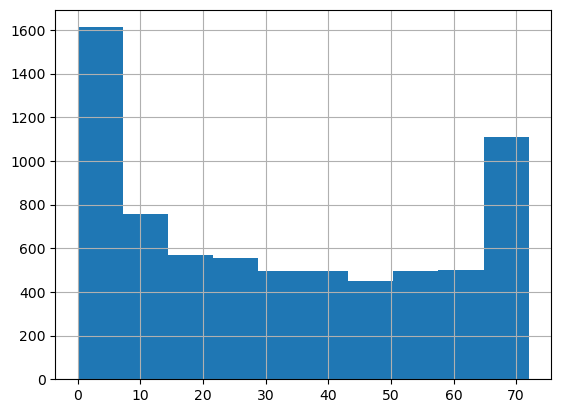

In [177]:
# see the distribution of tenure
df.tenure.hist()

In [181]:
# Next let's look at internet service types (handle those nulls)
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,2850,15,3287,2146,2578
payment_type_id,4,int64,0,3,4,1,3,3
internet_service_type_id,3,int64,0,2,2,1,3,1
contract_type_id,3,int64,0,1,3,1,2,1
customer_id,7043,object,0,4067-HLYQI,0020-INWCK,4695-VADHF,3079-BCHLN,3683-QKIUE
gender,2,object,0,Female,Female,Male,Male,Female
senior_citizen,2,object,0,No,No,No,No,No
partner,2,object,0,No,Yes,Yes,Yes,No
dependents,2,object,0,No,Yes,Yes,No,No
tenure,73,int64,0,33,71,18,47,6
phone_service,2,object,0,Yes,Yes,Yes,Yes,Yes


In [194]:
# Anyone with 'no internet service' has 'NaN' in the column
# Let's fix that
df.internet_service_type = df.internet_service_type.fillna('None')
df.internet_service_type.value_counts()

internet_service_type
Fiber optic    3096
DSL            2421
None           1526
Name: count, dtype: int64

In [201]:
# re-examine data
acquire.df_info(df)

,nunique,dtypes,isnull,3823
payment_type_id,4,int64,0,1
internet_service_type_id,3,int64,0,2
contract_type_id,3,int64,0,1
customer_id,7043,object,0,5376-DEQCP
gender,2,object,0,Female
senior_citizen,2,object,0,No
partner,2,object,0,No
dependents,2,object,0,No
tenure,73,int64,0,1
phone_service,2,object,0,Yes


In [203]:
# combine some columns
# look at phone services, they look connected
df.phone_service.value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

In [207]:
df.multiple_lines.value_counts()

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [218]:
df['phone_lines'] = np.select(
        [
        (df['multiple_lines'] == 'No') & (df['phone_service'] == 'Yes'),
        (df['multiple_lines'] == 'Yes')
        ],
        ['Single', 'Multiple'],
        default='No phone service'
    )
df.phone_lines

0                 Single
1               Multiple
2                 Single
3                 Single
4                 Single
              ...       
7038              Single
7039            Multiple
7040              Single
7041              Single
7042    No phone service
Name: phone_lines, Length: 7043, dtype: object

In [223]:
df = df.drop(columns=['phone_service','multiple_lines'])

In [225]:
acquire.df_info(df)

,nunique,dtypes,isnull,6025
payment_type_id,4,int64,0,3
internet_service_type_id,3,int64,0,2
contract_type_id,3,int64,0,1
customer_id,7043,object,0,8519-IMDHU
gender,2,object,0,Male
senior_citizen,2,object,0,Yes
partner,2,object,0,Yes
dependents,2,object,0,No
tenure,73,int64,0,15
online_security,3,object,0,No


In [228]:
# let's combine streaming services
df['streaming'] = np.select(
        [
        (df['streaming_movies'] == 'Yes') & (df['streaming_tv'] == 'Yes'),
        (df['streaming_movies'] == 'No') & (df['streaming_tv'] == 'No'),
        (df['streaming_movies'] == 'Yes'),
        (df['streaming_tv'] == 'Yes')
        ],
        ['Both', 'Neither', 'Movies', 'TV'],
        default='No internet service'
    )

In [234]:
df = df.drop(columns=['streaming_movies','streaming_tv'])

In [238]:
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,1145,2664,5982,4759,4490
payment_type_id,4,int64,0,4,2,4,2,1
internet_service_type_id,3,int64,0,1,3,3,3,1
contract_type_id,3,int64,0,1,1,3,3,1
customer_id,7043,object,0,1685-VAYJF,3785-NRHYR,8434-VGEQQ,6698-OXETB,6339-DKLMK
gender,2,object,0,Male,Male,Male,Male,Female
senior_citizen,2,object,0,No,No,No,No,No
partner,2,object,0,No,No,Yes,No,No
dependents,2,object,0,No,No,Yes,No,No
tenure,73,int64,0,11,1,61,11,13
online_security,3,object,0,No,No internet service,No internet service,No internet service,No


In [ ]:
# create function to prepare the data
def prep_telco(df):
    """
    
    """
    drop_columns = [
        'phone_service',
        'multiple_lines',
        'streaming_movies',
        'streaming_tv'
    ]
    
    # transform data
    df.senior_citizen = df.senior_citizen.map({0:'No',1:'Yes'})
    df.total_charges = df.total_charges.replace(' ',0).astype(float)
    df.internet_service_type = df.internet_service_type.fillna('None')